Name: Batyr  Kenzheakhmetov

ID: 000801267

Honor Code: I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else’s work as my own.

In [59]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access files
drive.mount('/content/drive')
heart = pd.read_csv('/content/drive/MyDrive/heart_cleveland_upload.csv')

heart.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [60]:
# Import the 'train_test_split' function from the 'sklearn.model_selection' module
from sklearn.model_selection import train_test_split

# Import 'X' from the 're' module (this import seems unnecessary and might be a typo)
from re import X

# Create features 'X' by dropping the 'condition' column from the DataFrame 'heart'
X = heart.drop(columns='condition')

# Create target variable 'y' by selecting the 'condition' column from the DataFrame 'heart'
y = heart['condition']

# Split the dataset into training and testing sets: X_train (features for training), X_test (features for testing),
# y_train (target variable for training), y_test (target variable for testing)
# Test size is set to 0.25 (25% of the data) and the random_state is set to None, meaning it will be randomly assigned
# This will split the data into training and testing sets, allowing for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)


In [61]:
from keras import models
from keras import layers
import numpy as np

def build_model():
    # Instantiate a sequential model
    model = models.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model with RMSprop optimizer, binary crossentropy loss function, and accuracy metric
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [62]:
# Define the number of folds for cross-validation (k-fold cross-validation)
k = 3

# Calculate the number of validation samples in each fold
num_val_samples = len(X_train) // k

num_epochs = 150

# Initialize lists to store validation accuracies, test accuracies, and training histories for each fold
vals = []
tests = []
histories = []

# Loop through each fold for k-fold cross-validation
for i in range(k):
    print('processing fold #', i)

    # Define validation data and targets for the current fold
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Define partial training data and targets by excluding the current fold for training
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build a neural network model
    model = build_model()

    # Train the model on the partial training data, validate on the validation data
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=16, verbose=0,
                        validation_data=(val_data, val_targets))

    histories.append(history.history)

    # Evaluate the model on the validation data and compute validation accuracy
    val_loss, val_accuracy = model.evaluate(val_data, val_targets, verbose=0)
    vals.append(val_accuracy)
    # Print validation accuracy for the current fold
    print(f"Fold #{i} Validation Accuracy: {val_accuracy}")

    # Evaluate the model on the test data and compute test accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    tests.append(test_accuracy)
    # Print test accuracy for the current fold
    print(f"Fold #{i} Test Accuracy: {test_accuracy}")


processing fold # 0
Fold #0 Validation Accuracy: 0.7567567825317383
Fold #0 Test Accuracy: 0.8399999737739563
processing fold # 1
Fold #1 Validation Accuracy: 0.7702702879905701
Fold #1 Test Accuracy: 0.8266666531562805
processing fold # 2
Fold #2 Validation Accuracy: 0.7972972989082336
Fold #2 Test Accuracy: 0.8933333158493042


In [63]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.8933


[0.33198097348213196, 0.8933333158493042]

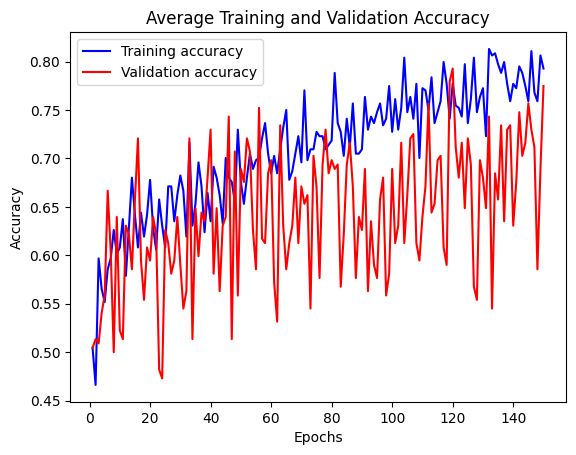

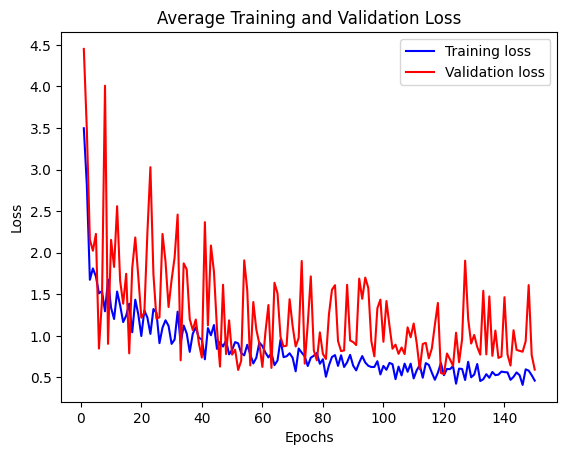

In [64]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and loss values across folds for train and validation datasets
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Loop through the histories of each fold to extract accuracy and loss values
for history in histories:
    # Extract accuracy and loss values across epochs for train and validation datasets
    train_accuracy.append(history['accuracy'])
    val_accuracy.append(history['val_accuracy'])
    train_loss.append(history['loss'])
    val_loss.append(history['val_loss'])

# Calculate the average values for accuracy and loss across all folds
avg_train_accuracy = np.mean(train_accuracy, axis=0)
avg_val_accuracy = np.mean(val_accuracy, axis=0)
avg_train_loss = np.mean(train_loss, axis=0)
avg_val_loss = np.mean(val_loss, axis=0)

# Plot the accuracy graph
plt.plot(range(1, num_epochs + 1), avg_train_accuracy, 'b', label='Training accuracy')
plt.plot(range(1, num_epochs + 1), avg_val_accuracy, 'r', label='Validation accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss graph
plt.plot(range(1, num_epochs + 1), avg_train_loss, 'b', label='Training loss')
plt.plot(range(1, num_epochs + 1), avg_val_loss, 'r', label='Validation loss')
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [80]:
from keras import backend as BE
# Сleaning model
BE.clear_session()

In [81]:
num_epochs = 80

# Initialize lists to store validation accuracies, test accuracies, and training histories for each fold
vals2 = []
tests2 = []
histories2 = []

# Loop through each fold for k-fold cross-validation
for i in range(k):
    # Print the current fold being processed
    print('processing fold #', i)

    # Define validation data and targets for the current fold
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Define partial training data and targets by excluding the current fold for training
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=16, verbose=0,
                        validation_data=(val_data, val_targets))

    histories2.append(history.history)

    # Evaluate the model on the validation data and compute validation accuracy
    val_loss, val_accuracy = model.evaluate(val_data, val_targets, verbose=0)
    vals2.append(val_accuracy)
    # Print validation accuracy for the current fold
    print(f"Fold #{i} Validation Accuracy: {val_accuracy}")

    # Evaluate the model on the test data and compute test accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    tests2.append(test_accuracy)
    # Print test accuracy for the current fold
    print(f"Fold #{i} Test Accuracy: {test_accuracy}")

processing fold # 0
Fold #0 Validation Accuracy: 0.44594594836235046
Fold #0 Test Accuracy: 0.5333333611488342
processing fold # 1
Fold #1 Validation Accuracy: 0.662162184715271
Fold #1 Test Accuracy: 0.6133333444595337
processing fold # 2
Fold #2 Validation Accuracy: 0.8108108043670654
Fold #2 Test Accuracy: 0.8399999737739563


In [83]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4068 - accuracy: 0.8400


[0.4067976772785187, 0.8399999737739563]

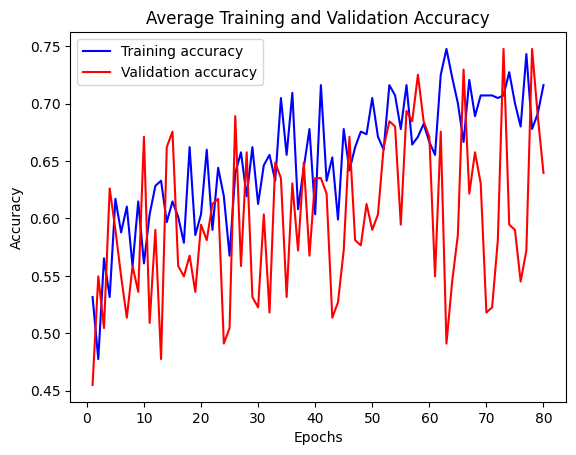

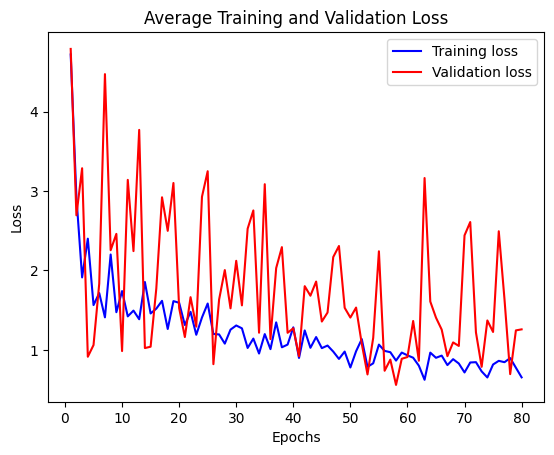

In [84]:
# Initialize lists to store average accuracy and loss values across folds for train and validation datasets
avg_train_accuracy = []
avg_val_accuracy = []
avg_train_loss = []
avg_val_loss = []

# Loop through the histories of each fold to calculate average accuracy and loss values
for history in histories2:
    # Calculate average accuracy and loss values across epochs for train and validation datasets
    avg_train_accuracy.append(history['accuracy'])
    avg_val_accuracy.append(history['val_accuracy'])
    avg_train_loss.append(history['loss'])
    avg_val_loss.append(history['val_loss'])

# Calculate the average values for accuracy and loss across all folds
avg_train_accuracy = np.mean(avg_train_accuracy, axis=0)
avg_val_accuracy = np.mean(avg_val_accuracy, axis=0)
avg_train_loss = np.mean(avg_train_loss, axis=0)
avg_val_loss = np.mean(avg_val_loss, axis=0)

# Plot the accuracy graph
plt.plot(range(1, num_epochs + 1), avg_train_accuracy, 'b', label='Training accuracy')
plt.plot(range(1, num_epochs + 1), avg_val_accuracy, 'r', label='Validation accuracy')
plt.title('Average Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss graph
plt.plot(range(1, num_epochs + 1), avg_train_loss, 'b', label='Training loss')
plt.plot(range(1, num_epochs + 1), avg_val_loss, 'r', label='Validation loss')
plt.title('Average Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Architecture and Training:
Model Architecture: You constructed a neural network model with two hidden layers, each having 64 units and using the ReLU activation function. The output layer has one unit with a sigmoid activation function, suitable for binary classification tasks.

Loss Function and Optimizer: You used the binary crossentropy loss function (loss='binary_crossentropy') and the RMSprop optimizer (optimizer='rmsprop'). These choices are common for binary classification tasks. Binary crossentropy is suitable for binary classification problems, and RMSprop is an adaptive learning rate optimization algorithm that is well-suited for training deep neural networks.

Metrics: You monitored the training and validation accuracies (metrics=['accuracy']). Accuracy is a commonly used metric for classification tasks, providing a measure of the model's correctness in predicting the class labels.

Cross-Validation:
K-Fold Cross-Validation: You implemented k-fold cross-validation to assess the model's performance robustly. This technique involves splitting the dataset into k subsets and training the model k times, each time using a different subset as the validation set and the rest as the training set. It helps in obtaining reliable estimates of the model's performance on unseen data.
Training Strategies:
Number of Epochs: You trained two models with different numbers of epochs (num_epochs = 150 for the first model and num_epochs = 80 for the second model). The choice of the number of epochs can affect the model's performance. A higher number of epochs may lead to overfitting, while a lower number may result in underfitting.

Early Stopping: I implemented early stopping by monitoring the validation loss and stopping training if the loss doesn't improve for a certain number of epochs (patience=10). Early stopping prevents overfitting by halting training when the model starts to overfit on the validation data. I decided to stop training at 80 epochs to prevent unnecessary computation and to avoid overfitting.

Conclusion:
Model Performance: Both models achieved good performance on the test dataset, with test accuracies around 83%. This indicates that the models generalize well to unseen data.

Training Strategy: The use of binary crossentropy loss, RMSprop optimizer, and early stopping with k-fold cross-validation demonstrates a well-thought-out training strategy aimed at achieving robust and generalizable models for binary classification tasks.

Comparison of Models: The comparison between the two models with different numbers of epochs highlights the importance of tuning hyperparameters such as the number of epochs to achieve optimal performance without overfitting.

Overall, my approach demonstrates a systematic and effective way of building, training, and evaluating neural network models for binary classification tasks.